# Perkenalan
- Nama : Muhammad Sanzabi Libianto
- Batch : 11
- Milestone 2 - Phase 1
- Objective : Membuat beberapa model Classification terhadap data CS:GO Round Winner Classification dengan data target berupa `round_winner`.

---
# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

Statment:

Kumpulan Library yang digunakan dalam project kali ini.

---
# Data Loading


In [2]:
df = pd.read_csv("csgo_round_snapshots.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  int64  
 2   t_score                       122410 non-null  int64  
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  float64
 5   ct_health                     122410 non-null  int64  
 6   t_health                      122410 non-null  int64  
 7   ct_armor                      122410 non-null  int64  
 8   t_armor                       122410 non-null  int64  
 9   ct_money                      122410 non-null  int64  
 10  t_money                       122410 non-null  int64  
 11  ct_helmets                    122410 non-null  int64  
 12  t_helmets                     122410 non-nul

Statment:

Memperlihatkan info dari setiap kolom pada dataset.

In [3]:
#df = df.astype({"bomb_planted": object})

Statment:

Meruba type data dari kolom bomb_planted dari bertype bool menjadi object.

In [4]:
df.head(3)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0,0,dust2,0.0,500,500,0,0,4000,...,0,0,0,0,0,0,0,0,0,CT
1,156.03,0,0,dust2,0.0,500,500,400,300,600,...,0,0,2,0,0,0,0,0,0,CT
2,96.03,0,0,dust2,0.0,391,400,294,200,750,...,0,0,2,0,0,0,0,0,0,CT


Statment:

Melihat 3 data teratas pada dataset.

# Exploratory Data Analysis (EDA)

## Korelasi antar coulmn 

In [5]:
df.corr()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
time_left,1.000000,0.000381,-0.003067,-0.486048,0.684514,0.678952,-0.089950,-0.195579,0.374530,0.341717,...,0.006278,0.007462,0.108141,0.036235,0.128073,0.004142,0.058112,0.044942,0.010688,0.018366
ct_score,0.000381,1.000000,0.626726,-0.015707,0.016495,-0.010987,0.100518,0.034789,0.249416,0.074700,...,0.168219,0.051485,0.136987,0.038498,0.152342,0.008133,0.051174,0.062015,-0.011149,-0.004670
t_score,-0.003067,0.626726,1.000000,-0.010080,0.002840,0.001720,0.035370,0.081671,0.069768,0.258855,...,0.064676,0.118714,0.058564,0.104194,0.049208,0.011222,0.030615,0.144589,0.016507,-0.026379
bomb_planted,-0.486048,-0.015707,-0.010080,1.000000,-0.619132,-0.448040,-0.281474,-0.096619,-0.190107,-0.125822,...,-0.229871,-0.197067,-0.217222,-0.231708,-0.192438,0.015815,-0.022317,-0.220578,-0.033638,-0.024219
ct_health,0.684514,0.016495,0.002840,-0.619132,1.000000,0.756167,0.391429,0.140262,0.306399,0.217013,...,0.326589,0.248142,0.337015,0.266243,0.299532,-0.019960,0.046761,0.262061,0.046326,0.033921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t_grenade_incendiarygrenade,0.004142,0.008133,0.011222,0.015815,-0.019960,0.012683,-0.053678,0.040938,-0.000720,0.052548,...,-0.022308,0.054379,-0.017931,0.043893,-0.016379,1.000000,-0.020062,0.011937,-0.009436,-0.013646
ct_grenade_molotovgrenade,0.058112,0.051174,0.030615,-0.022317,0.046761,0.016732,0.080041,-0.068558,0.114220,0.023718,...,0.119602,-0.027156,0.110894,-0.018945,0.061805,-0.020062,1.000000,-0.015560,-0.007780,-0.005318
t_grenade_molotovgrenade,0.044942,0.062015,0.144589,-0.220578,0.262061,0.312744,0.292294,0.639853,-0.054578,0.176183,...,0.326849,0.818655,0.376916,0.812387,0.335175,0.011937,-0.015560,1.000000,0.053987,0.007665
ct_grenade_decoygrenade,0.010688,-0.011149,0.016507,-0.033638,0.046326,0.036673,0.096492,0.030713,-0.086894,-0.003800,...,0.044817,0.046699,0.068453,0.051160,0.030878,-0.009436,-0.007780,0.053987,1.000000,0.010776


Statment:

Pada table korelasi diatas, dapat terlihat bahwa kolom yang akan mejadi target yaitu kolom *round_winner*, tidak termasuk dalam table diatas dimana artinya kolom target tersebut tidak memiliki korelasi apapun dengan data lainnya. Namun terdapat beberapa kolom yang memiliki korelasi cukup tinggi terhadap kolom lainnya pada dataset, antara lain kolom *time_left* dengan *bomb_planted* dan *ct_health*. 

Dikarenakan dari beberapa review mengenai korelasi kolom tidak menentukan akurasi dari model Klasifikasi, disini saya tidak melakukan drop yang memiliki korelasi rendah terhadap kolom lainnya.

## Melihat type data pada data target

T     50.981129
CT    49.018871
Name: round_winner, dtype: float64

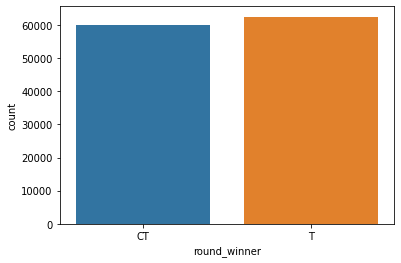

In [6]:
sns.countplot(data=df,x='round_winner')
df.round_winner.value_counts() * 100 / len(df)

Statment:

Dari diagram diatas dapat dilihat bahwa type data pada data target adalah **Moderatly Balance**, dimana data pada kelas 0 dan 1 memiliki perbedaan yang tidak begitu signifikan hanya berbeda sekitar 1.9%. Sehingga pada dataset ini saya tidak akan melakukan metode SMOTE pada kolom target. 

## Melihat jumlah kemenangan di tiap map

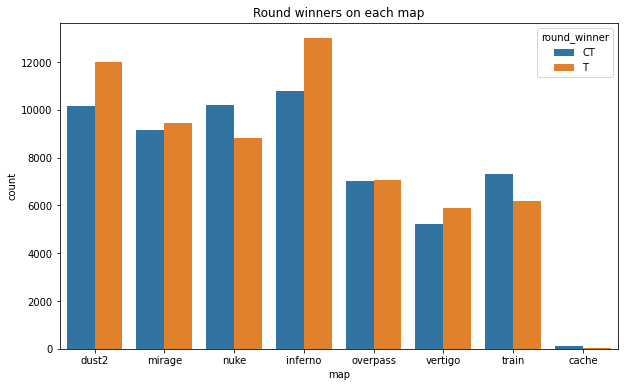

In [7]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="map", hue="round_winner", data=df)
ax.set(title='Round winners on each map')
plt.show()

Statment:

Pada visualisasi diagram diatas dapat dilihat bahwa ada beberapa Map dimana terdapat fraksi Teroris maupun Anti-Teroris lebih unggul. Dimana untuk fraksi Teroris sangat unggul pada map **dust2** dan **inferno**, dengan keunggulan kurang lebih sekitar 2000 rounds. Sedangkan untuk Anti-Teroris dapat mengungguli pada map **nuke** dan **train**.

Dimana dari EDA ini saja kita dapat melakukan analisa terhadap permainan yang akan dilakukan untuk penentuan kita menjadi fraksi Teroris maupun Anti-Teroris apabila bermain di map-map tersebut. `Uniknya pada dataset kali ini hanya terdapat 8 map yang menjadi tempat untuk bermain, padahal didalam game CSGO sendiri terdapat setidaknya ada 25 official maps`. Namun hal ini dapat dijelaskan mengenai dataset ini berasal, dimana dataset tersebut diambil dari turnamen-turnamen CSGO dari tahun 2019 hingga 2020 yang dimana Valve selaku pengembang game memiliki 8 Maps sebagai paling balance dan competitive diantara banyak map tersebut.

## Melihat senjata apa saja yang menjadi favorite di game

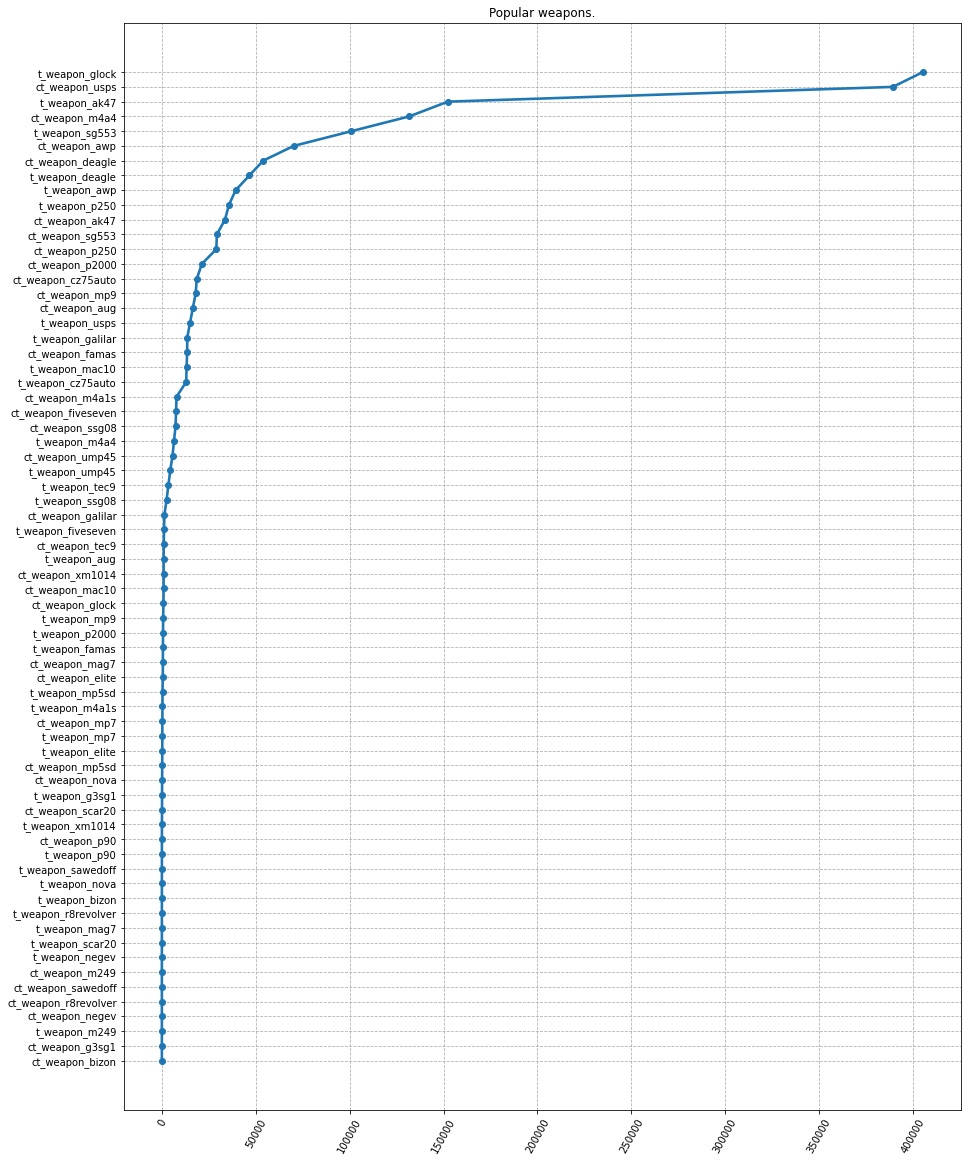

In [8]:
weapons = ['ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
           'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
           'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
           't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
           'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
           't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
           'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
           'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
           'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
           'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
           'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',
           'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver',
           't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff',
           'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553',
           't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08',
           'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014',
           't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle',
           'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps',
           't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000',
           't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9']

outs = [0]*len(weapons)

for i in range(0, len(weapons)):
    outs[weapons.index(weapons[i])] = sum(df[weapons[i]])
       
for i in range(0, len(weapons)):
    weapons[i] = [weapons[i], outs[i]]

weapons.sort(key=lambda xx: xx[1], reverse=False)

x = []
y = []

for i in range(0, len(weapons)):
    x.append(weapons[i][0])
    y.append(weapons[i][1])

plt.figure(figsize=(15, 20))
plt.title("Popular weapons.")
plt.grid(linestyle="--")
plt.xticks(rotation=61)
plt.plot(y, x, linewidth=2.61, marker="o")
plt.show()                                

Statment:

Dapat dilihat pada visualisasi diagram diatas, dimana ada beberapa senjata yang menjadi andalan para setiap pemain dalam bermain game CSGO tersebut. Diantaranya Ak-47 untuk fraksi teroris dan M4a4 untuk fraksi Anti-teroris, dimana kedua senjata ini menjadi andalan untuk masing-masing fraksi. Buktinya kedua senjata tersebut berjumlah hampir 200.000 pemakaian dari keseluruhan dataset, kemudian diikuti oleh senjata-senjata lainnya.

`Uniknya terdapat total ada 33 senjata dan 6 grenades yang ada pada game CSGO tersebut, namun hanya ada beberapa yang senjata yang sering digunakan oleh para pemain dalam hal ini para pemain pro`. Hal ini didukung dengan adanya senjata yang berjumlah 28 jenis dimana para pemain hanya menggunakannya <10 atau bahkan tidak pernah sama sekali. 

Penggunaan dari beberapa senjata tersebut tidak lepas dari faktor Meta atau senjata yang sedang digemari akibat dari faktor X yang tidak dapat dijelaskan dari dataset, antara lain ada faktor dari update dari kekuatan senjata, harga dari senjata ataupun faktor-faktor lainnya.

**Disclaimer**:

Untuk senjata glock dan usps yang berada pada peringkat 1 dan 2 merupakan senjata awal yang berupa pistol dimana setiap pemain pasti akan mendapatkannya di awal ronde permainan sedangkan untuk senjata lainnya merupakan pilihan dari pemain yang dibeli melalui market didalam game setiap rondenya ataupun mendapatkan senjata dari drop musuh ketika musuh tersebut terbunuh. Dimana hal ini dapat menjelaskan mengapa fraksi Anti Teroris memiliki kolom ct_weapon_AK47 padahal senjata AK47 khusus dimiliki oleh fraksi Teroris saja.

---
# Data Preprocessing

## Data Inference

In [9]:
data_inf = df.sample(15, random_state=42)
data_inf.head(3)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
47053,175.00,11,4,vertigo,0.0,500,500,400,300,700,...,1,0,1,0,0,0,0,0,1,CT
28740,94.95,8,4,dust2,0.0,400,450,400,477,10300,...,2,2,2,3,0,0,0,0,0,CT
92746,14.93,14,10,dust2,0.0,366,100,395,98,2350,...,0,1,0,0,0,0,1,0,0,CT


Statment:

Mengambil sample pada dataset berjumlah 15 (Data Inference), yang nanti akan digunakan sebagai data baru untuk melihat hasil prediksi dari model yang telah dibuat.

In [10]:
data_train_set = df.drop(data_inf.index)
data_train_set.head(3)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0,0,dust2,0.0,500,500,0,0,4000,...,0,0,0,0,0,0,0,0,0,CT
1,156.03,0,0,dust2,0.0,500,500,400,300,600,...,0,0,2,0,0,0,0,0,0,CT
2,96.03,0,0,dust2,0.0,391,400,294,200,750,...,0,0,2,0,0,0,0,0,0,CT


Statment:

Menghapus seluruh data inference pada dataset dan selanjutnya membentuk dataset untuk data Training

In [11]:
data_train_set.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf.tail(3)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
12,5.77,6,1,train,1.0,300,459,282,486,4400,...,0,2,1,1,1,0,1,0,0,T
13,175.00,4,3,inferno,0.0,500,500,284,0,12000,...,0,2,0,1,0,0,0,0,0,CT
14,169.95,7,2,dust2,0.0,500,500,197,0,38050,...,0,0,0,0,0,0,0,0,0,CT


Statment: 

 Melakukan reset index pada kedua dataset yang telah terbentuk. Hal ini dilakukan agar pada saat data dimasukkan ke dalam model tidak akan menimbulkan error dikarenakan index yang tidak tersusun.

## Split Dataset (Data Training & Data Testing)

In [12]:
X = data_train_set.drop("round_winner", axis=1)
y = data_train_set["round_winner"]
y.value_counts()

T     62399
CT    59996
Name: round_winner, dtype: int64

Statment:

Melakukan split antara data X (Feature) dan y (target). Pada kasus ini kolom `round_winner` yang akan menjadi kolom target dari model.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (97916, 96)
Test size:  (24479, 96)


Statment:

Pada tahap ini akan dilakukan split data berupa data Training dan data Testing, untuk settingan besaran datanya adalah sebesar 80% Data Training dan 20% untuk Data testing.

## Handling Missing Value

In [14]:
df.isnull().sum().sum()

0

Statment:

Pada tahap Handling Missing Value ini tidak akan diakukan, dikarenakan dataset yang digunakan tidak memiliki data Null di semua kolomnya. Sehingga proses ini akan di skip yang selanjutnya akan masuk ke bagian Feature Engineering.

---
# Feature Engineering

## Handling Outlier

In [15]:
dist_check = X_train.skew(numeric_only=True)

normal_dist = []
skew_dist = []

for i in range(len(dist_check)):
    if dist_check.values[i] < -0.5:
        skew_dist.append(dist_check.index[i])
    elif dist_check.values[i] > 0.5:
        skew_dist.append(dist_check.index[i])
    else:
        normal_dist.append(dist_check.index[i])
        
print('Kolom Skew Distribution :', skew_dist)
print("=================================="*5)

print('Kolom Normal Distribution :',normal_dist)
print("=================================="*5)

Kolom Skew Distribution : ['ct_score', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 'ct_money', 't_money', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive', 'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp', 't_weapon_bizon', 'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas', 't_weapon_g3sg1', 'ct_weapon_galilar', 't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock', 'ct_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova', 'ct_weapon_p90', 't_weapon_p90', 't_weapon_r8revolver', 't_weapon_sawedoff', 'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553', 't_weapon_sg553', 'ct_weapon_ssg08', 't_wea


Statment: 

Pada hasil diatas dapat dilihat bahwa kolom yang memilki distribusi skew pada dataset ini banyak sekali, sedangkan untuk yang normal distribution hanya ada beberapa dari keseluruhan kolom.

In [16]:
def detect_skew(df, parameter, fold=1.5):

    for i in parameter:

        IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
        upper = df[parameter].quantile(0.75) + (fold*IQR)
        bottom = df[parameter].quantile(0.25) - (fold*IQR)

        upper_count = df[
            (df[parameter] > upper)
        ][parameter].count()

        bottom_count = df[
            (df[parameter] < bottom)
        ][parameter].count()

        total_count = upper_count + bottom_count
        percentage = (total_count/len(df[parameter])*100).round(2)

        a = ({'Column': parameter, 'Total Outliers': total_count,
             'Percentage': percentage})
    return print(a)

for i in skew_dist:
    detect_skew(X_train, parameter=i)

{'Column': 'ct_score', 'Total Outliers': 470, 'Percentage': 0.48}
{'Column': 'bomb_planted', 'Total Outliers': 10956, 'Percentage': 11.19}
{'Column': 'ct_health', 'Total Outliers': 6425, 'Percentage': 6.56}
{'Column': 't_health', 'Total Outliers': 2503, 'Percentage': 2.56}
{'Column': 'ct_armor', 'Total Outliers': 0, 'Percentage': 0.0}
{'Column': 'ct_money', 'Total Outliers': 3674, 'Percentage': 3.75}
{'Column': 't_money', 'Total Outliers': 2508, 'Percentage': 2.56}
{'Column': 'ct_defuse_kits', 'Total Outliers': 0, 'Percentage': 0.0}
{'Column': 'ct_players_alive', 'Total Outliers': 12432, 'Percentage': 12.7}
{'Column': 't_players_alive', 'Total Outliers': 11765, 'Percentage': 12.02}
{'Column': 'ct_weapon_ak47', 'Total Outliers': 20888, 'Percentage': 21.33}
{'Column': 't_weapon_ak47', 'Total Outliers': 0, 'Percentage': 0.0}
{'Column': 'ct_weapon_aug', 'Total Outliers': 9840, 'Percentage': 10.05}
{'Column': 't_weapon_aug', 'Total Outliers': 701, 'Percentage': 0.72}
{'Column': 'ct_weapon_a

Statment:

Pada tahap ini dapat dilihat bahwa nilai persenan outliers dari beberapa tiap kolomnya sangat besar, rata-rata diatas 5%, sehingga selanjutnya akan dilakukan proses Handling Outlier dengan menggunakan metode capping (Winsorizer).

Namun dapat dilihat bahwa rata-rata kolom yang mengalami outlier adalah kolom senjata, dimana IQR menghitung seperti kolom **ct_weapon_ak47** yang mengangap kolom tersebut termasuk dalam outlier. `Hal tersebut dikarenakan fraksi Anti-Terorist tidak memiliki senjata AK-47 sebagai senjata utama mereka, melainkan senjata tersebut adalah dropan dari fraksi Teroris yang mati sehingga kolom tersebut mencatat nilai yang tinggi disaat fraksi CT mengambil senjata tersebut`. Oleh karena itu, saya tidak akan melakukan capping pada kolom-kolom senjata yang ada namun tetap akan melakukan capping pada kolom **ct_score** hingga **t_players_alive**.

In [17]:
windsoriser = Winsorizer(capping_method='iqr',
                          tail='both', 
                          fold=1.5,
                          variables=['ct_score', 'ct_health', 't_health',
                                     'ct_armor','ct_money','t_money', 
                                     'ct_players_alive', 't_players_alive'])
windsoriser.fit(X_train)
X_train_t = windsoriser.transform(X_train)

print('Left Tail Caps  : ', windsoriser.left_tail_caps_)
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'ct_score': -7.5, 'ct_health': 122.5, 't_health': 52.5, 'ct_armor': -244.0, 'ct_money': -18650.0, 't_money': -23075.0, 'ct_players_alive': 2.5, 't_players_alive': 2.5}
Right Tail Caps :  {'ct_score': 20.5, 'ct_health': 726.5, 't_health': 768.5, 'ct_armor': 924.0, 'ct_money': 34550.0, 't_money': 42725.0, 'ct_players_alive': 6.5, 't_players_alive': 6.5}


Statment:

Setelah dilakukan Handing Outlier dengan menggunakan metode capping, maka nilai pada kolom yang terdapat data outlier sekarang telah di capping menjadi data maksimum dan minimum tiap kolomnya.

In [18]:
print('ct_money - Before Capping')
print(X_train.ct_money.describe())
print('')
print('ct_money - After Capping')
print(X_train_t.ct_money.describe())

ct_money - Before Capping
count    97916.000000
mean      9790.533212
std      11217.668188
min          0.000000
25%       1300.000000
50%       5500.000000
75%      14600.000000
max      80000.000000
Name: ct_money, dtype: float64

ct_money - After Capping
count    97916.000000
mean      9356.253319
std       9765.607965
min          0.000000
25%       1300.000000
50%       5500.000000
75%      14600.000000
max      34550.000000
Name: ct_money, dtype: float64


Statment:

Hasilnya dpaat dilihat dari Handling Outlier dengan metode capping pada kolom ct_money , dimana nilai max sebelum capping adalah 80000 berubah menjadi 34550 setelah dilakukannya capping.

## Feature Selection

In [19]:
df.t_weapon_g3sg1.value_counts()

0    122342
1        45
2        18
3         4
4         1
Name: t_weapon_g3sg1, dtype: int64

Statment:

Pada tahap Feature Selection ini, saya melakukan beberapa drop kolom senjata yang berdasarkan visualisasi pada EDA sangat jarang dipakai. Untuk rangenya disini saya menset penggunaan senjata < 100, sehingga untuk drop kolomnya dimulai dari kolom t_weapon_g3sg1.

In [20]:
X_train_t.drop(["t_weapon_g3sg1", "ct_weapon_scar20", "t_weapon_xm1014", "ct_weapon_p90", 
              "t_weapon_p90", "t_weapon_sawedoff", "t_weapon_nova", "t_weapon_bizon",
              "t_weapon_r8revolver", "t_weapon_mag7", "t_weapon_scar20", "t_weapon_negev",
              "ct_weapon_m249", "ct_weapon_sawedoff", "ct_weapon_r8revolver", 
              "ct_weapon_negev", "t_weapon_m249", "ct_weapon_g3sg1", "ct_weapon_bizon"],
             axis=1, inplace=True)

X_test.drop(["t_weapon_g3sg1", "ct_weapon_scar20", "t_weapon_xm1014", "ct_weapon_p90", 
              "t_weapon_p90", "t_weapon_sawedoff", "t_weapon_nova", "t_weapon_bizon",
              "t_weapon_r8revolver", "t_weapon_mag7", "t_weapon_scar20", "t_weapon_negev",
              "ct_weapon_m249", "ct_weapon_sawedoff", "ct_weapon_r8revolver", 
              "ct_weapon_negev", "t_weapon_m249", "ct_weapon_g3sg1", "ct_weapon_bizon"],
             axis=1, inplace=True)

In [21]:
X_test.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_cz75auto',
       't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite',
       'ct_weapon_famas', 't_weapon_famas', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4',
       'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7',
       'ct_weapon_mp5sd', 't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7',
       'ct_weapon_mp9', 't_weapon_mp9', 'ct_weapon_nova', 'ct_weapon_sg553',
       't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08',
       'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014',
       'ct_we

Statment:

Melakukan drop yang telah ditentukan pada data X_train dan X_test.

## Split Numerical column dan Categorical column

In [22]:
num_coulmn = X_train_t.select_dtypes(include=np.number).columns.tolist()
cat_coulmn = X_train_t.select_dtypes(include=["object"]).columns.tolist()

print("Numerical Columns :",num_coulmn)
print("Categorical Columns :",cat_coulmn)

final_features = num_coulmn + cat_coulmn

Numerical Columns : ['time_left', 'ct_score', 't_score', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive', 'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas', 'ct_weapon_galilar', 't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock', 'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9', 'ct_weapon_nova', 'ct_weapon_sg553', 't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08', 'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle', 'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_us

Statment:

Melakukan split berdasarkan type columnya terhadap data pada table X_train.

## Pipeline Scalling

In [23]:
pipe_FE = ColumnTransformer([
    ('Minmaxscaler', MinMaxScaler(), num_coulmn),
    ("OneHotEncoder", OneHotEncoder(), cat_coulmn)
])  

Statment:

Inisiasi scalling dengan menggunakan pipeline, dimana untuk kolom numerik menggunakan MinMax Scalling dikarenakan data pada numerik kebanyakan datanya skew dan untuk kategorical menggunakan OneHot Scaller dikarenakan data pada kolom kategorical hanya berisi True dan False serta nama map (Tidak berurutan).

---
# Model Definition

Pada tahap ini akan dilakukan pendefisian model yang akan dipakai, Yaitu :
- Logistic Regression
- KNN
- SVM
- Random Forest Classifier 

## Logistic Regression

In [24]:
LR = LogisticRegression(random_state=42)

pipe_LR = Pipeline([
    ('preprocessing', pipe_FE),
    ('LR', LR)
])

params_LR = {
    'LR__solvers': ['newton-cg', 'lbfgs', 'liblinear'],
    'LR__penalty': ['l2', 'l1'],
    'LR__c_values': [100, 10, 1.0, 0.1, 0.01]
}

Statment:

Mendefinisikan model Logistic Regression dengan menggunakan pipeline dan menset hyperparameter tuning untuk mendapatkan hasil yang lebih optimal.

## K-Nearest Neighbor

In [25]:
KNN = KNeighborsClassifier()

pipe_KNN = Pipeline([
    ('preprocessing', pipe_FE),
    ('KNN', KNN)
])

params_KNN = {
    'RF__weights': ['uniform', 'distance'],
    'RF__metric': ['euclidean', 'manhattan']
}

Statment:

Mendefinisikan model K-Nearest Neighbor dengan menggunakan pipeline dan menset hyperparameter tuning untuk mendapatkan hasil yang lebih optimal.

## SVM Classifier

In [26]:
SVM = SVC(random_state=42)

pipe_SVM = Pipeline([
    ('preprocessing', pipe_FE),
    ('SVM', SVM)
])

params_SVM = {
    'SVM__kernel': ['rbf', 'sigmoid'],
    'SVM__C': [50, 10, 1.0],
    'SVM__gamma': ['scale', 'auto']
}

Statment:

Mendefinisikan model SVM Classifier dengan menggunakan pipeline dan menset hyperparameter tuning untuk mendapatkan hasil yang lebih optimal.

## Random Forest Classifier

In [27]:
RF = RandomForestClassifier(random_state=42)

pipe_RF = Pipeline([
    ('preprocessing', pipe_FE),
    ('RF', RF)
])

params_RF = {
    'RF__criterion': ['gini', 'entropy'],
    'RF__min_samples_split': [2, 16, 32, 64],
    'RF__max_features': ['sqrt', 'log2']
}

Statment:

Mendefinisikan model Random Forest Classifier dengan menggunakan pipeline dan menset hyperparameter tuning untuk mendapatkan hasil yang lebih optimal.

---
# Model Training

In [28]:
# prepare models and put it into list
models = []
models.append(('Logistic Regression', pipe_LR))
models.append(('SVM Classifier', pipe_SVM))
models.append(('Random Forest', pipe_RF))
models.append(('KNN', pipe_KNN))


# Create empty list to stores result
names = []
results = []
mean_score = []
stdev_score = []

# Cross-validate each model
for name, model in models:
    model.fit(X_train_t,y_train)
    scores = cross_val_score(model, X_train_t, y_train, scoring='f1_weighted', cv=3, n_jobs=-1)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':names, 'mean_score':mean_score, 'stdev_score':stdev_score})

Statment:

Melakukan Training pada setiap model yang telah didefinisikan sebelumnya. Kemudian melakukan validasi silang pada tiap model dengan data training yang telah di siapkan sebelumnya dan kemudian hasil dari validasi silang tersebut disimpan pada sebuah table. Namun untuk tahap cross-validation ini saya membatas CV atau splitting strategy dari metode tersebut sebanyak 3. Hal ini dikarenakan waktu pemrosesan yang memakan waktu cukup lama dimana pada objective kali ini menggunakan dataset berjumlah cukup banyak.

---
# Model Evaluation

In [29]:
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
2,Random Forest,0.8560,0.0011
3,KNN,0.8016,0.0007
1,SVM Classifier,0.7666,0.0007
0,Logistic Regression,0.7487,0.0014


Statment:

Setelah dilakukan Training terhadap model yang digunakan, maka didapatkan nilai dari evaluasinya. Dimana model Random Forest mendapatka nilai mean score terbaik yaitu sebesar 0.85 dengan nilai standar deviasi atau persebaran datanya sebesar 0.0012. Sedangkan untuk model di posisi ke KNN memilki nilai mean score yang tidak terlalu baik apa bila dibandingkan dengan Random Forest, Namun uniknya model KNN dan SVM memiliki nilai standar deviasi yang kecil yaitu hanya 0.0004. 

Selanjutnya model Random Forest tersebut akan dilakukan Hyperparameter Tuning terhadap data yang digunakan dan akan diimplementasikan terhadap data Inference.

## Hyperparameter Tuning Random Forest

In [30]:
grid_RF_rand = RandomizedSearchCV(
    pipe_RF, params_RF, cv=3, scoring='f1_weighted', n_jobs=-1, random_state=10
).fit(X_train_t, y_train)

best_params_RF_rand = grid_RF_rand.best_params_
best_pipe_RF_rand = grid_RF_rand.best_estimator_
df_result_RF_rand = pd.DataFrame.from_dict(grid_RF_rand.cv_results_, orient='columns')

Statment:

Pada Hyperparameter Tuning ini menggunakan metode Randomized Search CV sebagai pencari parameter terbaik untuk model terhadap data yang digunakan. Sekali lagi disini untuk tahap Hyperparameter Tuning ini saya membatas CV atau splitting strategy dari metode tersebut sebanyak 3. Hal ini dikarenakan waktu pemrosesan yang memakan waktu cukup lama dimana pada objective kali ini menggunakan dataset berjumlah cukup banyak.

In [31]:
best_params_RF_rand

{'RF__min_samples_split': 2,
 'RF__max_features': 'log2',
 'RF__criterion': 'entropy'}

Statment:

Hyperparameter terbaik untuk model Random Forest yaitu:
- min_samples_split: 2
- max_features: log2
- criterion: entropy

In [32]:
print("========== Hasil classification Report terhadap data Testing ==========")
print(classification_report(y_test, best_pipe_RF_rand.predict(X_test)))

========== Hasil classification Report terhadap data Testing ==========
              precision    recall  f1-score   support

          CT       0.86      0.89      0.88     12000
           T       0.89      0.87      0.88     12479

    accuracy                           0.88     24479
   macro avg       0.88      0.88      0.88     24479
weighted avg       0.88      0.88      0.88     24479



Statment:

Berdasarkan Hasil classification Report terhadap data testing diatas dapat diketahui bahwa model yang telah dibuat memiliki akurasi sebesar 88% dimana akurasi tersebut cukup baik dalam melakukan prediksi terhadap data testing. Selain itu model juga memiliki nilai f1_score yang cukup baik dimana dari kedua kelas CT (Fraksi Anti Teroris) maupun T (Fraksi Teroris) masing-masing mendapatkan nilai sebesar 88%. Hal ini menandakan bahwa model telah berjalan dan melakukan prediksi yang cukup baik.

In [33]:
print('==================== Train Results (Random Forest Classifier) ====================')
print(roc_auc_score(y_train, best_pipe_RF_rand.predict_proba(X_train_t)[:, 1]))

print('==================== Test Results (Random Forest Classifier) ====================')
print(roc_auc_score(y_test, best_pipe_RF_rand.predict_proba(X_test)[:, 1]))

==================== Train Results (Random Forest Classifier) ====================
0.9998738587206653
==================== Test Results (Random Forest Classifier) ====================
0.9490495565884018


Statment:
    
Pada nilai ROC-AUC pada model Random Forest didapati bahwa nilai ROC-AUC pada data train sebesar 0.99 sedangkan untuk data test sebesar 0.94. Dimana dapat dikatakan bahwa model Random Forest tersebut adalah **Good Fit**, Sehingga dapat dikatakah bahwa model yang telah dibuat dapat berjalan dengan baik dalam membuat prediksi di kedua data testing maupun data training.

---
# Model Inference 

In [34]:
data_inf.head(3)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,11,4,vertigo,0.0,500,500,400,300,700,...,1,0,1,0,0,0,0,0,1,CT
1,94.95,8,4,dust2,0.0,400,450,400,477,10300,...,2,2,2,3,0,0,0,0,0,CT
2,14.93,14,10,dust2,0.0,366,100,395,98,2350,...,0,1,0,0,0,0,1,0,0,CT


Statment:

Melihat data Inference sebelum masuk ke model untuk di prediksi.

In [35]:
X_inf = data_inf.drop(['round_winner'], axis=1)
X_inf = X_inf[final_features]

y_inf = data_inf['round_winner']

Statment:

Melakukan drop data target pada data Inference, yang nanti data target tersebut akan digunakan sebagai prediksi bandingan terhadap model.


In [36]:
y_inf_pred_RF = best_pipe_RF_rand.predict(X_inf)
y_inf_pred_RF

array(['CT', 'T', 'CT', 'T', 'T', 'T', 'T', 'T', 'T', 'CT', 'CT', 'CT',
       'T', 'CT', 'CT'], dtype=object)

Statment:

Melakukan prediksi pada model RF dengan menggunakan data Inference, model yang dipakai adalah model dengan Hyperparameter terbaik yang telah dituning sebelumnya.

In [37]:
y_pred_inf_df_RF = pd.DataFrame(y_inf_pred_RF ,columns=["RF Prediction"])
y_pred_inf_df_RF

,RF Prediction
0,CT
1,T
2,CT
3,T
4,T
5,T
6,T
7,T
8,T
9,CT


Statment: 

Hasil prediksi data Inference dengan model RF, Kemudian merubahnya menjadi bentuk dataframe.

In [38]:
hasil_RF = pd.concat([data_inf, y_pred_inf_df_RF],axis=1)
hasil_RF[["round_winner","RF Prediction"]]

,round_winner,RF Prediction
0,CT,CT
1,CT,T
2,CT,CT
3,T,T
4,T,T
5,T,T
6,CT,T
7,T,T
8,T,T
9,CT,CT


Statment:

Dapat dilihat pada table diatas, dari 15 data Inference yang dimasukkan kedalam model terdapat hasil prediksi yang salah pada 4 data yaitu pada index 1, 6, 8 dan 11. Dengan hasil tersebut dapat dikatakan bahwa model yang digunakan telah melakukan prediksi dengan baik apabila dilakukan pengetesan dengan data inference. 

# Pengambilan Kesimpulan

Statment:

Pada objective kali ini adalah menggunakan kolom **round_winner** sebagai target pada model prediksi, dimana diharapkan dapat memprediksi potensi kemenangan dari sebuah fraksi Teroris maupun Counter Teroris dengan menggunakan data mengenai pertandingan CSGO. Ada 4 model yang digunakan pada Milestone 2 - Phase 1 kali ini, antara lain:

- Random Forest Classifier
- SVM
- KNN
- Logistic Regression

Berdasarkan EDA yang telah dilakukan sebelumnya, didapati bahwa kolom yang akan mejadi target yaitu kolom *round_winner*, tidak termasuk dalam table diatas dimana artinya kolom target tersebut tidak memiliki korelasi apapun dengan data lainnya. Namun terdapat beberapa kolom yang memiliki korelasi cukup tinggi terhadap kolom lainnya pada dataset, antara lain kolom *time_left* dengan *bomb_planted* dan *ct_health*. `Dikarenakan dari beberapa review mengenai korelasi kolom tidak menentukan akurasi dari model Klasifikasi, disini saya tidak melakukan drop yang memiliki korelasi rendah terhadap kolom lainnya`. Pada bagian EDA ini pula didapati bahwa kolom target adalah **Moderatly Balance**, dimana data pada kelas 0 dan 1 memiliki perbedaan yang tidak begitu signifikan hanya berbeda sekitar 1.9%.

Kemudian saya melakukan EDA lanjutan dimana menemukan hal yang menarik pada dataset kali ini yaitu mengenai Jumlah kemenangan tiap fraksi pada map tertentu. Terdapat beberapa Map dimana terdapat fraksi Teroris maupun Anti-Teroris lebih unggul. Dimana untuk fraksi Teroris sangat unggul pada map **dust2** dan **inferno**, dengan keunggulan kurang lebih sekitar 2000 rounds. Sedangkan untuk Anti-Teroris dapat mengungguli pada map **nuke** dan **train**. `Uniknya pada dataset kali ini hanya terdapat 8 map yang menjadi tempat untuk bermain, padahal didalam game CSGO sendiri terdapat setidaknya ada 25 official maps`. Namun hal ini dapat dijelaskan mengenai dataset ini berasal, dimana dataset tersebut diambil dari turnamen-turnamen CSGO dari tahun 2019 hingga 2020 yang dimana Valve selaku pengembang game memiliki 8 Maps sebagai paling balance dan competitive diantara banyak map tersebut.

Selanjutnya saya masih mengeksplorasi EDA dimana saya mendapatkan insight menarik mengenai beberapa senjata yang menjadi andalan para setiap pemain dalam bermain game CSGO tersebut. Diantaranya Ak-47 untuk fraksi teroris dan M4a4 untuk fraksi Anti-teroris, dimana kedua senjata ini menjadi andalan untuk masing-masing fraksi. Buktinya kedua senjata tersebut berjumlah hampir 200.000 pemakaian dari keseluruhan dataset, kemudian diikuti oleh senjata-senjata lainnya. `Uniknya menurut Valve selaku pengembang game terdapat total ada 33 senjata dan 6 grenades yang ada pada game CSGO tersebut, namun hanya ada beberapa yang senjata yang sering digunakan oleh para pemain dalam hal ini para pemain pro`. Hal ini didukung dengan adanya senjata yang berjumlah 28 jenis dimana para pemain hanya menggunakannya <10 atau bahkan tidak pernah sama sekali. Penggunaan dari beberapa senjata tersebut tidak lepas dari faktor Meta atau senjata yang sedang digemari akibat dari faktor X yang tidak dapat dijelaskan dari dataset, antara lain ada faktor dari update dari kekuatan senjata, harga dari senjata ataupun faktor-faktor lainnya.

Kemudian pada bagian Model Evaluation, didapatkan bahwa model Random Forest lah yang memiliki nilai mean terbaik yaitu sebesar 0.8561 dan nilai standar deviasi atau persebarannya sebesar 0.0012. Namun terdapat keunikan pada proses evaluasi model kali ini, model SVM dan KNN yang memiliki nilai mean dibawah Random Forest namun memiliki nilai standar deviasi yang lebih kecil daripada model Random Forest yang hanya 0.0004. `Untuk hasil Classification Report terhadap model Random Forest didapati model yang telah dibuat memiliki akurasi sebesar 88% dimana akurasi tersebut cukup baik dalam melakukan prediksi terhadap data testing`. Selain itu model juga memiliki nilai f1_score yang cukup baik dimana dari kedua kelas CT (Fraksi Anti Teroris) maupun T (Fraksi Teroris) masing-masing mendapatkan nilai sebesar 88%. Hal ini menandakan bahwa model telah berjalan dan melakukan prediksi yang cukup baik. Sedangkan untun penilaian berdasarkan metode ROC-AUC didapati bahwa nilai ROC-AUC pada data train sebesar 0.99 sedangkan untuk data test sebesar 0.94. Dimana dapat disimpulkan bahwa model Random Forest tersebut adalah **Good Fit**.

Pada proses Hyperparameter Tuning, saya menggunakan Randomized Search CV sebagai teknik dalam mencari Hyperparameter terbaik bagi model Random Forest. Hasilnya yaitu:

Random Forest Classifier
- min_samples_split: 2
- max_features: sqrt
- criterion: entropy

Selanjutnya untuk hasil prediksi dengan menggunakan data Inference sebagai data baru, dari 15 data Inference yang dimasukkan kedalam model terdapat hasil prediksi yang salah ada 4 data. `Dengan hasil tersebut dapat dikatakan bahwa model yang digunakan telah melakukan prediksi dengan baik apabila dilakukan pengetesan dengan data Inference`. 
 
======================================================================================================================================


**Improvment Note**

Untuk catatan improvment kedepan yaitu:
- Menambahkan range CV pada metode Cross-Validation sebagai pembanding antar model dan pada metode Randomized Search sebagai Hyperparameter Tuning terhadap model. Dimana pada objective kali ini hanya menggunakan cv = 3, sehingga hasil dari masing-masing kurang optimal dikarenakan hanya ada 3 split strategy yang dilakukan dari metode tersebut. Hal ini sengaja dilakukan pada objective kali ini dikarenakan waktu yang terbatas oleh karena itu semoga dapat dijadikan improvment kedepannya.
- Dapat menambah beberapa model klasifikasi seperti Ada Boost, Decision Tree dan lainnya sebagai pembanding manakah model terbaik untuk dataset kali ini.



In [39]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(best_pipe_RF_rand, f)